# 1. Introduction

L'Analyse en Composantes Principales (ACP), ou PCA en anglais, est une méthode de réduction de dimension basée sur l'algèbre linéaire. Elle permet de projeter des données de grande dimension dans un espace de plus petite dimension tout en conservant un maximum d'information (variance).

Mathématiquement, l'ACP repose sur les **vecteurs propres** (directions principales) et **valeurs propres** (variances associées) de la **matrice de covariance** des données centrées. Ces éléments sont issus de la résolution du problème suivant :

\[
\Sigma v = \lambda v
\]

où :
- \( \Sigma \) est la matrice de covariance des données centrées,
- \( v \) est un vecteur propre (axe principal),
- \( \lambda \) est la valeur propre associée (variance projetée sur cet axe).

L'algèbre linéaire intervient donc à chaque étape : **centrage**, **produits matriciels**, **calculs des valeurs/vecteurs propres**, et **projection** dans un nouvel espace.

Dans ce projet, nous appliquons pas à pas l'ACP sur le jeu de données `digits`, uniquement avec NumPy et les outils d'algèbre linéaire.



# 2. Chargement, préparation des données 

In [1]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

Dans cette étape, nous chargeons le jeu de données `digits` depuis `sklearn.datasets`. Ce jeu contient **1797 images de chiffres manuscrits** (de 0 à 9), chacun représenté par une matrice de **8×8 pixels**, soit **64 pixels** par image.

Chaque image est **applatie** sous forme d’un vecteur ligne de 64 valeurs. Ainsi, notre matrice `X` contient :
- **1797 lignes** (chaque ligne = une image),
- **64 colonnes** (chaque colonne = intensité d’un pixel).

Nous stockons aussi les étiquettes associées (0 à 9) dans le vecteur `y`, qui nous permettra plus tard d’afficher les chiffres selon leur vraie classe.

Cette structure est essentielle pour appliquer l’algèbre linéaire : la matrice \( X \in \mathbb{R}^{1797 \times 64} \) sera utilisée pour calculer la matrice de covariance et effectuer la réduction de dimension via les outils de l’algèbre linéaire.

In [2]:
digits = load_digits()
X = digits.data  # matrice des pixels (1797, 64)
y = digits.target  # étiquettes de 0 à 9  # données (1797,)

# 3.  Centrage des données

Avant de calculer la matrice de covariance, il est essentiel de centrer les données. Cela signifie que, pour chaque pixel (chaque colonne), on soustrait la moyenne des valeurs.

Pourquoi ?  
Le centrage permet de recentrer les données autour de zéro, ce qui est une condition nécessaire pour que la **matrice de covariance** reflète correctement la variance et les corrélations entre les variables.

Mathématiquement, si \( X \in \mathbb{R}^{n \times p} \) est la matrice de données, on calcule la version centrée :

\[
X_{centré} = X - \bar{X}
\]

où \( \bar{X} \) est la moyenne de chaque colonne.

Cela garantit que chaque variable a une moyenne nulle :
\[
\text{moyenne}(X_{centré}) = 0
\]

C’est une étape fondamentale dans toute application de l’ACP.


In [11]:
# Calcul de la moyenne de chaque colonne
mean = np.mean(X, axis=0)

# Centrage de X
X_centre = X - mean

# 4. Calcul de la matrice de covariance

Une fois les données centrées, on peut calculer la **matrice de covariance**, notée souvent \( \Sigma \), qui capture la manière dont les variables (ici, les pixels) varient ensemble.

Formule :
\[
\Sigma = \frac{1}{n} X_{centré}^T X_{centré}
\]

- \( X_{centré} \) est la matrice centrée de taille \( n \times p \),
- \( \Sigma \in \mathbb{R}^{p \times p} \) est une matrice **symétrique**,
- L’élément \( \Sigma_{ij} \) représente la covariance entre la variable \( i \) et la variable \( j \).

Pourquoi est-ce important ?  
C’est cette matrice qui permet ensuite de trouver les **vecteurs propres** (axes principaux) et les **valeurs propres** (variances projetées). C’est donc le cœur de l’algèbre linéaire dans l’ACP.

In [12]:
n_samples = X_centre.shape[0]
cov_matrix = (1 / (n_samples - 1)) * X_centered.T @ X_centered
cov_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.8229975 ,  2.40099498, ..., -0.1598953 ,
         0.09851423, -0.07406182],
       [ 0.        ,  2.40099498, 22.60837352, ..., -1.15544033,
         1.41203571,  0.72988047],
       ...,
       [ 0.        , -0.1598953 , -1.15544033, ..., 34.81734839,
        15.64854441,  2.87558266],
       [ 0.        ,  0.09851423,  1.41203571, ..., 15.64854441,
        16.73258202,  4.72078588],
       [ 0.        , -0.07406182,  0.72988047, ...,  2.87558266,
         4.72078588,  3.46005282]])

# 5. Calcul des valeurs propres et vecteurs propres

Nous allons maintenant appliquer un outil fondamental de l’algèbre linéaire : la **décomposition spectrale** de la matrice de covariance.

Nous cherchons les **valeurs propres** (notées \( \lambda \)) et **vecteurs propres** (notés \( v \)) de la matrice de covariance \( \Sigma \), en résolvant :

\[
\Sigma v = \lambda v
\]

- Chaque **valeur propre** \( \lambda \) indique la **variance expliquée** dans une direction particulière.
- Le vecteur propre \( v \) associé indique **dans quelle direction** cette variance est la plus forte.

Ces vecteurs propres forment les **axes principaux** du nouveau repère dans lequel nous allons projeter nos données.  
Ils sont **orthogonaux** entre eux et permettent de représenter les données avec un maximum de clarté dans un espace réduit.

Dans NumPy, on utilise `np.linalg.eig()` pour extraire ces éléments de la matrice de covariance.


In [13]:
valeurs_propres, vecteurs_propres = np.linalg.eig(cov_matrix)

# Trier les valeurs propres et vecteurs propres par ordre décroissant
indices_tries = np.argsort(valeurs_propres)[::-1]
valeurs_propres = valeurs_propres[indices_tries]
vecteurs_propres = vecteurs_propres[:, indices_tries]

# 6. Sélection des composantes principales (2D ou 3D)

Maintenant que nous avons les vecteurs propres, nous pouvons **projeter** nos données centrées dans le nouvel espace réduit.

Pour faire une projection en 2D :
- On prend les **2 vecteurs propres associés aux plus grandes valeurs propres**.
- On les place en colonnes dans une matrice \( W \in \mathbb{R}^{p \times 2} \).
- On calcule la projection :
\[
Z = X_{centré} \cdot W
\]

Résultat :
- \( Z \) est une matrice \( n \times 2 \) qui représente nos données dans un nouvel espace 2D.
- On a donc réduit les dimensions de 64 à 2 tout en **préservant le plus d'information possible** (la plus grande part de la variance totale).

Cette projection est la dernière étape mathématique de l'ACP. On peut ensuite visualiser les résultats avec un graphique 2D (ou 3D si on utilise 3 composantes).


In [14]:
# 1. Trier les valeurs propres et vecteurs propres par ordre décroissant
valeurs_propres_ordre = np.argsort(valeurs_propres)[::-1]  # indices triés des plus grandes valeurs propres
valeurs_propres = valeurs_propres[valeurs_propres_ordre]
vecteurs_propres = vecteurs_propres[:, valeurs_propres_ordre]

# 2. Sélectionner les deux premiers vecteurs propres (composantes principales)
vecteurs_principaux = vecteurs_propres[:, :2]  # shape (64, 2)

# 3. Projeter les données centrées dans le nouvel espace 2D
X_projete_2D = X_centre @ vecteurs_principaux  # shape (n_samples, 2)

# Afficher les dimensions de la projection pour vérification
print("Dimensions des données projetées :", X_projete_2D.shape)

Dimensions des données projetées : (1797, 2)


# 7. Projection dans l'espace réduit et Visualisation en 2D

Après avoir calculé les composantes principales (vecteurs propres associés aux plus grandes valeurs propres) et projeté nos données initiales dans ce nouvel espace, nous obtenons une représentation plus compacte et significative des données.

#### Objectif

- Visualiser les données projetées dans un espace à 2 dimensions (2 premières composantes principales).
- Observer comment les données (ici des images de chiffres) se regroupent selon leurs classes.
- Comprendre la séparation entre les classes dans l’espace réduit, ce qui est utile pour la classification ou la détection de motifs.

#### Méthodologie

1. **Projection 2D** : Utiliser les deux premiers vecteurs propres pour projeter chaque point de données (image) dans un espace 2D.
2. **Visualisation** : Créer un graphique de dispersion (`scatter plot`) où chaque point est coloré selon sa classe (le chiffre correspondant).
3. Cette visualisation permet d’observer les regroupements naturels des chiffres similaires dans l’espace réduit.

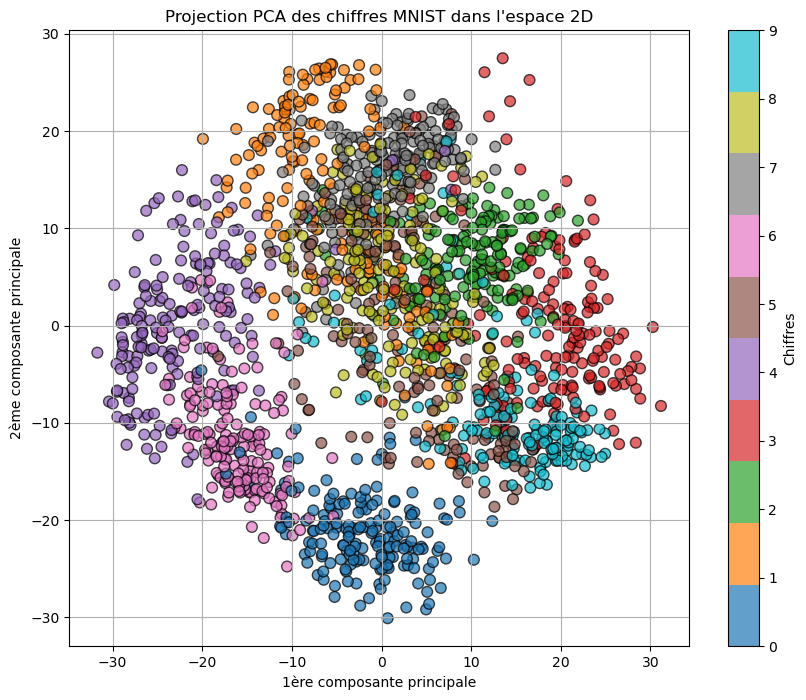

In [15]:
# X_projete_2D : matrice des données projetées en 2D (n_samples x 2)
# digits.target : vecteur des labels (classes) des images

plt.figure(figsize=(10, 8))

# Scatter plot des données projetées
scatter = plt.scatter(
    X_projete_2D[:, 0],   # coordonnée sur la 1ère composante principale
    X_projete_2D[:, 1],   # coordonnée sur la 2ème composante principale
    c=digits.target,      # couleurs selon la classe des chiffres
    cmap='tab10',         # palette de couleurs distinctes (10 classes)
    alpha=0.7,
    edgecolor='k',
    s=60
)

plt.xlabel('1ère composante principale')
plt.ylabel('2ème composante principale')
plt.title("Projection PCA des chiffres MNIST dans l'espace 2D")
plt.colorbar(scatter, ticks=range(10), label='Chiffres')
plt.grid(True)
plt.show()

# 8. Projection en 3D

#### Objectif

- Étendre la projection des données dans un espace réduit à 3 dimensions en utilisant les trois premières composantes principales.
- Visualiser les données projetées en 3D pour mieux comprendre leur structure et les relations entre les classes.
- Cette visualisation permet d’explorer davantage la séparation des classes dans un espace plus riche, tout en gardant une dimension réduite.

#### Méthodologie

1. **Sélection des trois premières composantes principales** : On utilise les trois vecteurs propres correspondant aux trois plus grandes valeurs propres.
2. **Projection des données centrées** sur ces vecteurs propres, ce qui donne une représentation 3D.
3. **Visualisation interactive** à l’aide de matplotlib en 3D, où chaque point est coloré selon sa classe (chiffre).
4. Cela permet d’observer les regroupements et la distribution spatiale dans un espace à 3 dimensions, souvent plus révélateur qu’en 2D.


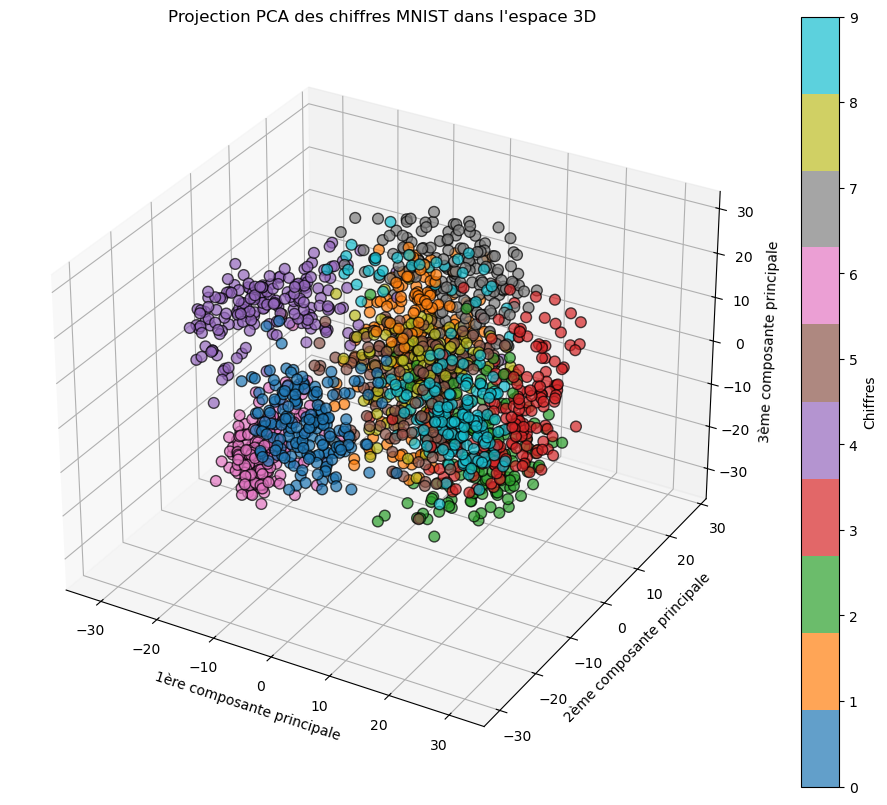

In [16]:
from mpl_toolkits.mplot3d import Axes3D  # nécessaire pour la 3D dans matplotlib

# Sélection des 3 premières composantes principales
vecteurs_principaux_3D = vecteurs_propres[:, :3]

# Projection des données centrées dans l'espace 3D
X_projete_3D = X_centre @ vecteurs_principaux_3D

# Visualisation 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_projete_3D[:, 0],  # 1ère composante principale
    X_projete_3D[:, 1],  # 2ème composante principale
    X_projete_3D[:, 2],  # 3ème composante principale
    c=digits.target,     # couleur selon la classe
    cmap='tab10',
    alpha=0.7,
    edgecolor='k',
    s=60
)

ax.set_xlabel('1ère composante principale')
ax.set_ylabel('2ème composante principale')
ax.set_zlabel('3ème composante principale')
ax.set_title("Projection PCA des chiffres MNIST dans l'espace 3D")

fig.colorbar(scatter, ticks=range(10), label='Chiffres')
plt.show()

# 9. Explication de la variance expliquée